In [1]:
#펭수/워크맨 csv 불러와서 시각화 및 머신러닝
# 패키지 import
import datetime as dt
import pandas as pd   #df 분석용
import requests
import time
import urllib.request #
import re     
import konlpy

from bs4 import BeautifulSoup
from pandas import DataFrame
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from nltk import FreqDist

In [2]:
# 시각화  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image             #워드클라우드용
from wordcloud import WordCloud   #워드클라우드용
fpath = "NotoSansCJKkr-Bold.otf"   #워드클라우드 국문지원을 위한 별도 폰트 path 설정
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
############### Read #################
peng_intro = pd.read_csv('peng_intro.csv')  # 펭수의 intro DF 
work_intro = pd.read_csv('work_intro.csv')  # 워크맨의 intro DF 

peng = pd.read_csv('peng.csv')               #펭수의 동영상list DF
peng_reply = pd.read_csv('peng_reply.csv')   #펭수의 동영상별 댓글list DF

work = pd.read_csv('work.csv')               #워크맨의 동영상list DF
work_reply = pd.read_csv('work_reply.csv')   #워크맨의 동영상별 댓글list DF

############# 구분자 추가 ################
for i in range(len(peng)): peng['구분'] = 1  # 펭수 1 
for i in range(len(work)): work['구분'] = 0  # 워크맨 0
for i in range(len(peng_reply)): peng_reply['구분'] = 1   # 펭수 1 
for i in range(len(work_reply)): work_reply['구분'] = 0   # 워크맨 0
    
############## DF 통합 ##################
# 1) 펭수 + 워크맨 intro DF 통합
intro_paw = pd.DataFrame(peng_intro)       
intro_paw = intro_paw.append(work_intro)

# 2) 펭수 + 워크맨 동영상list DF 통합
paw = pd.DataFrame(peng)     
paw = paw.append(work)

# 3) 펭수 + 워크맨 동영상별 댓글list DF 통합
paw_reply = pd.DataFrame(peng_reply)  
paw_reply = paw_reply.append(work_reply)    


In [4]:
intro_paw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 0
Data columns (total 4 columns):
Unnamed: 0    2 non-null int64
구분            2 non-null object
구독자           2 non-null object
영상수           2 non-null int64
dtypes: int64(2), object(2)
memory usage: 80.0+ bytes


In [5]:
paw = paw.astype({'좋아요': int},{'싫어요':int},{'댓글수':int}) #int형 재확인
paw.describe()  #  통합한 동영상list DF 확인

,Unnamed: 0,좋아요,싫어요,구분
count,158.000000,158.000000,158.000000,158.000000
mean,51.253165,30021.518987,468.962025,0.778481
std,36.693070,32570.177719,688.637526,0.416589
min,0.000000,2400.000000,8.000000,0.000000
25%,19.250000,9925.000000,69.250000,1.000000
50%,43.500000,17500.000000,163.500000,1.000000
75%,82.750000,35750.000000,466.250000,1.000000
max,122.000000,180000.000000,3600.000000,1.000000


In [6]:
paw_reply.info()  # 통합한 동영상별 댓글list DF 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3160 entries, 0 to 699
Data columns (total 6 columns):
Unnamed: 0      3160 non-null int64
ID              3160 non-null object
Comment         3160 non-null object
Like            3160 non-null int64
Title_number    3160 non-null int64
구분              3160 non-null int64
dtypes: int64(4), object(2)
memory usage: 172.8+ KB


In [7]:
paw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 34
Data columns (total 9 columns):
Unnamed: 0    158 non-null int64
제목            158 non-null object
주소            158 non-null object
조회수           158 non-null object
좋아요           158 non-null int32
싫어요           158 non-null int64
댓글수           158 non-null object
본문내용          158 non-null object
구분            158 non-null int64
dtypes: int32(1), int64(3), object(5)
memory usage: 11.7+ KB


In [8]:
intro_paw.head()

,Unnamed: 0,구분,구독자,영상수
0,1,펭수,135만명,133
0,2,워크맨,353만명,35


,구분,좋아요
0,0,79771.428571
1,1,15865.040650


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54861 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48420 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44537 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49556 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51096 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46272 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46748 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44753 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47148 missing from current font.
  font.set_text(s, 0, flags=flags)


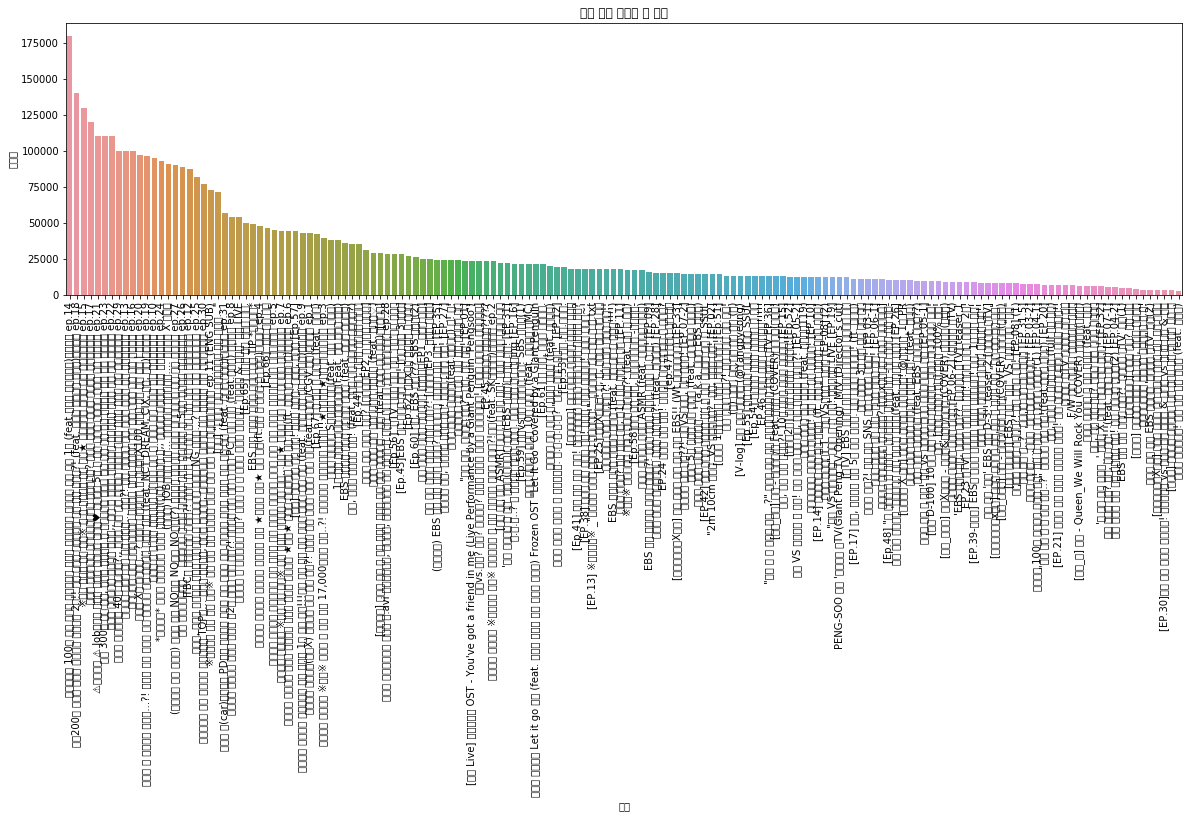

In [9]:
from matplotlib import font_manager, rc

fig = plt.figure(figsize=(20,5))
plt.title('가장 많은 좋아요 순 정렬')
sns.barplot(x='제목', y='좋아요', data=paw[['제목', '좋아요']].groupby('제목', as_index=False).mean().sort_values(by='좋아요', ascending=False));
plt.xticks(rotation=90); #x축(country) 회전
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 구분에 따른 요약
paw[['좋아요','구분']].groupby('구분', as_index=False).mean().sort_values(by='좋아요', ascending=False).head()

In [10]:
############ UNLIKE RATIO 구하기 ############  
# 워킹맨 구독자 수가(353만명) 펭수(134만명)의 3배이상으로, 
# 비율을 구해 서로의 값을 확인 예정

unlike_ratio_list = []
for i in range(len(paw)): 
    unlike_ratio = (paw.iloc[i, 5] / paw.iloc[i,4]) * 100  # 퍼센테이지 표현
    unlike_ratio_ar= round(unlike_ratio,2)                 # 소숫점 2자리까지 표현 
    unlike_ratio_list.append(unlike_ratio_ar)          

paw['unlike_ratio(%)'] = unlike_ratio_list                 # ratio 열 생성

In [11]:
paw.head() 

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분,unlike_ratio(%)
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,1,1.78
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,1,0.99
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,1,0.47
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,1,1.10
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,1,0.68


In [12]:
paw_reply.head() 

,Unnamed: 0,ID,Comment,Like,Title_number,구분
0,0,EBSDocumentary (EBS 다큐),"펭수...곧 백만이네,,, 짜싁 멋지다,,,,날씨가 많이 춥다,,,, 감기 조심허구...",2500,0,1
1,1,펭랑단1호,악플러들 고소하고 EBS 빚 갚자,1300,0,1
2,2,Isabel la,아니 무슨 교육방송이 ㅋㅋㅋ 왠만한 예능프로그램보다 더 잘만들어 자막이고 편집이고 ...,1000,0,1
3,3,gravity,위험한 물품 가지고 있어여? “제 자신” ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,652,0,1
4,4,월드곰탱이,초반 영상부터 다 봐온 사람으로서열심히 한 죄밖에 없는데너무 힘들게 하는듯나쁜 댓글...,924,0,1


,구분,unlike_ratio(%)
0,0,1.903143
1,1,1.007561


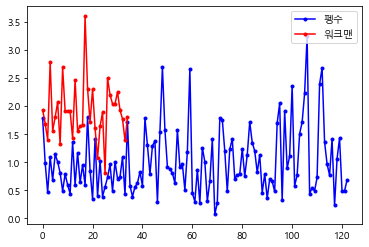

In [22]:
# unlike에 따른 정렬 및 시각화
peng_list=[]  # 현재 df가 통합되어, 색상 분리를 위해 다시 분리
work_list=[]

for i in range(len(paw)):        
    if (paw.iloc[i,8]) == 1:   # '구분'이 펭수일 경우
        peng=paw.iloc[i,9]         # 펭수의 ratio를 peng_list에 삽입
        peng_list.append(peng)
        
    else:
        work=paw.iloc[i,9]         # '구분'이 워크맨일 경우 
        work_list.append(work)     # 워크맨의 ratio를 work_list에 삽입

plt.plot(peng_list, marker='.', color='b')   # 펭수: blue
plt.plot(work_list, marker='.', color='r')   # 워크맨: red
plt.legend(['펭수', '워크맨'], loc='upper right')

# 구분에 따른 요약
paw[['unlike_ratio(%)','구분']].groupby('구분', as_index=False).mean().sort_values(by='unlike_ratio(%)',
                                                                               ascending=False).head()

(-0.5, 799.5, 799.5, -0.5)

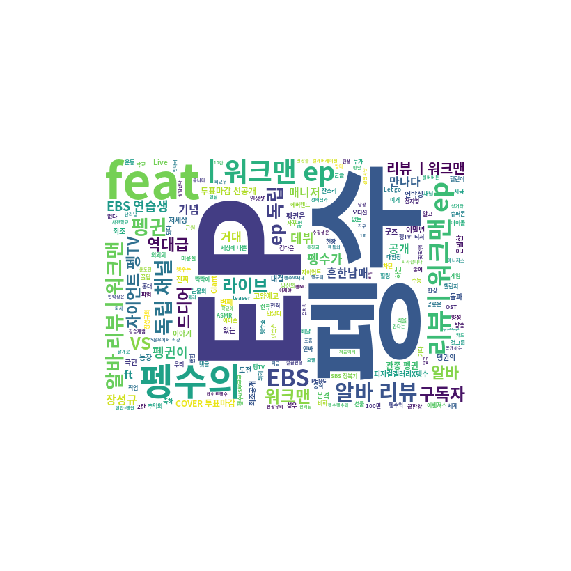

In [14]:
# 워드 클라우드 설정
title_l2s=(''.join(paw["제목"])) # paw의 제목df를 string으로

image_test=np.array(Image.open("ytbb.png")) #mask 이미지 설정
wc = WordCloud(max_font_size=200,font_path=fpath,background_color='#FFFFFF',
               width=1200,height=800,mask=image_test).generate(title_l2s)

#사이즈 등 설정
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')

In [15]:
total_cnt = len(paw_reply['ID'])
cnt_1percent= total_cnt*0.01
print("* 전체 댓글 개수:", len(paw_reply['ID']), ", 전체 댓글의 1% 개수:", cnt_1percent)
print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User ID 빈도수 확인(count):")
print(paw_reply['ID'].value_counts(ascending=False)[:31]) # 빈도수 기준 내림차순

print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User 빈도수 확인(ratio):")
print(paw_reply['ID'].value_counts(normalize=True)[:31])  # 비율 기준 출력

* 전체 댓글 개수: 3160 , 전체 댓글의 1% 개수: 31.6
/////////////////////////////////////////////////////////////////////////////
* 상위 10% User ID 빈도수 확인(count):
 자이언트 펭TV                         40
 워크맨-Workman                      34
 나눈누                              16
 Jeje                             15
 고잉메리쓰                            11
 펭랑단1호                            10
 펭수쳐돌이                             9
 펭펭                                8
 SAJOgroup                         7
 오석현                               7
 9 cw                              6
 JE Choi                           6
 콩절미                               6
 ᄋᄋ                                6
 지금이순간                             6
 둘기                                5
 유달별                               5
 인사처TV                             5
 반현정                               5
 Amber Rodriguez                   5
 polarin                           5
 민트마카롱                             5
 공인회계사50th                         5
 

In [17]:
# csv 파일의 columnms 확인
paw.columns
paw_reply.columns

Index(['Unnamed: 0', 'ID', 'Comment', 'Like', 'Title_number', '구분'], dtype='object')

In [18]:
# csv 파일에서 필요한 column만 리스트로 저장
paw_title_list = paw.제목.tolist()
paw_content_list = paw.본문내용.tolist()
paw_reply_list = paw_reply.Comment.tolist()

In [19]:
# 리스트 출력하여 확인
print(paw_title_list[:3])  #부하로 인해 테스트로 3개만 출력

['[Ep 67] 전 세계 게 섰거라 (feat. 외교부)', '[Ep.66]  화보 모델 펭수', '펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡)']


In [20]:
# 형태소 분석
from konlpy.tag import Okt
okt=Okt()

TypeError: Package <Java package kr.lucypark.okt.OktInterface._name> is not Callable

In [21]:
# 제목 리스트 명사 분석
title_list=[]
for i in range(len(paw_title_list)):
    title_list.append(okt.nouns(paw_title_list[i]))
    
# 본문 내용 명사 분석
content_list=[]
for i in range(len(paw_content_list)):
    content_list.append(okt.nouns(paw_content_list[i]))

# 댓글 내용 명사 분석
reply_list=[]
for i in range(len(paw_reply_list)):
    reply_list.append(okt.nouns(paw_reply_list[i]))

NameError: name 'okt' is not defined

In [32]:
# 리스트 안의 리스트 하나의 리스트로 만들기
def flatten (n):
    org =[]
    for i in n :
        if (isinstance(i,list)):
            org += flatten(i)
        else:
            org.append(i)
    return org

In [33]:
flatten(title_list) # 실행되는지 확인

['전',
 '세계',
 '게',
 '외교부',
 '화보',
 '모델',
 '펭수',
 '펭수',
 '팬',
 '최강',
 '컬래버레이션',
 '신상',
 '뮤비',
 '린지',
 '세상',
 '펭귄',
 '수험생',
 '지금',
 '당장',
 '이',
 '영상',
 '정승',
 '쌤',
 '남극',
 '유치원',
 '동창회',
 '시작',
 '둘리',
 '선배',
 '등장',
 '윤도현',
 '선배',
 '본부',
 '만남',
 '우리',
 '호흡',
 '난리',
 '남',
 '펭수',
 '매니저',
 '사관학교',
 '매니저',
 '스',
 '펭',
 '인간',
 '펭귄',
 '첫',
 '데이트',
 '펭수',
 '실버',
 '버튼',
 '날개',
 '언박싱',
 '처음',
 '나',
 '펭수',
 '학교',
 '잠입',
 '공',
 '행운',
 '펭수',
 '카드',
 '탄생',
 '비화',
 '개',
 '펭수',
 '퇴사',
 '정복기',
 '이제야',
 '공개',
 '추억',
 '라이브',
 '진행',
 '펭',
 '펭수',
 '관심사',
 '대결',
 '정복기',
 '친구',
 '간다',
 '펭수',
 '비밀',
 '펭귄',
 '극장',
 '스타',
 '외로워',
 '한류',
 '펭귄',
 '펭수',
 '해외진출',
 '프랑스',
 '편',
 '추억',
 '독자',
 '축하',
 '라이브',
 '트렌치코트',
 '언박싱',
 '단독',
 '펭귄',
 '의혹',
 '전격',
 '해부',
 '독점',
 '인터뷰',
 '김민교',
 '양치',
 '승',
 '펭수',
 '진짜',
 '나이',
 '살',
 '펭귄',
 '극장',
 '내',
 '나이',
 '자이언트',
 '펭',
 '방송',
 '시간',
 '변경',
 '안내',
 '펭',
 '야유회',
 '지옥',
 '신상',
 '타이틀곡',
 '뮤직비디오',
 '린지',
 '교감',
 '선생님',
 '풀',
 '펭수',
 '갑자기',
 '뱀',
 '우리',
 '펭수',
 '눈물',
 '펭귄',
 '극장',


In [34]:
# 제목, 본문 내용, 댓글 내용 하나의 리스트로 취합
title_f = flatten(title_list)
content_f = flatten(content_list)
reply_f = flatten(reply_list)

In [35]:
# 단어 빈도수 확인을 위한 패키지 import
from nltk.book import *
import operator
from nltk.corpus import brown
from nltk.corpus import stopwords

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [36]:
# 제목 빈도수 확인
fdist1 = FreqDist(title_f)
title_dict = {}
content_dict = {}
reply_dict = {}

dict_w = {}
for w in title_f:
    dict_w[w] = fdist1[w]
title_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(title_dict)

[('펭수', 87), ('워크맨', 38), ('펭귄', 30), ('리뷰', 29), ('알바', 28), ('펭', 13), ('채널', 12), ('공개', 11), ('독립', 10), ('매니저', 9), ('연습생', 9), ('세상', 8), ('자이언트', 8), ('장성규', 8), ('라이브', 7), ('독자', 7), ('눈물', 7), ('역대', 7), ('최초', 7), ('선배', 5), ('직캠', 5), ('투표', 5), ('게임', 5), ('인', 5), ('것', 5), ('데뷔', 5), ('민속촌', 5), ('언박싱', 4), ('대결', 4), ('편', 4), ('방송', 4), ('마감', 4), ('선공', 4), ('현장', 4), ('도전', 4), ('거대', 4), ('이말년', 4), ('고양예고', 4), ('기념', 4), ('관종', 4), ('남매', 4), ('폭발', 4), ('세계', 3), ('린지', 3), ('영상', 3), ('남극', 3), ('등장', 3), ('우리', 3), ('남', 3), ('첫', 3), ('학교', 3), ('극장', 3), ('스타', 3), ('진짜', 3), ('펭수쇼', 3), ('안', 3), ('힐링', 3), ('선물', 3), ('본격', 3), ('알', 3), ('의', 3), ('수능', 3), ('이야기', 3), ('말', 3), ('피지', 3), ('컬', 3), ('갤러리', 3), ('빡빡이', 3), ('아저씨', 3), ('굿', 3), ('선', 3), ('대회', 3), ('전지영', 3), ('은밀', 3), ('명', 3), ('돌파', 3), ('댓글', 3), ('두', 3), ('주의', 3), ('일', 3), ('홍대', 3), ('뽀로로', 3), ('인생', 3), ('먹방', 3), ('배달', 3), ('시급', 3), ('사장', 3), ('드립', 3), ('끝판', 3), ('꿀', 3)

In [37]:
# 본문 내용 빈도수 확인
fdist1 = FreqDist(content_f)
dict_w = {}
for w in content_f:
    dict_w[w] = fdist1[w]
content_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(content_dict)

[('펭수', 130), ('리뷰', 74), ('알바', 69), ('장성규', 60), ('워크맨', 47), ('직업', 37), ('스튜디오', 34), ('펭', 28), ('펭귄', 25), ('인력', 23), ('것', 20), ('영상', 19), ('독자', 18), ('자이언트', 18), ('매니저', 16), ('소장', 16), ('잡것', 16), ('공개', 14), ('수', 14), ('친구', 13), ('여러분', 12), ('연습생', 12), ('나', 11), ('우리', 11), ('위해', 10), ('선배', 10), ('덜', 10), ('위', 9), ('이번', 9), ('이', 9), ('남극', 9), ('더', 9), ('편', 9), ('세상', 7), ('거', 7), ('꿀팁', 7), ('앞', 7), ('크리에이터', 7), ('뽀로로', 7), ('시간', 6), ('하나', 6), ('방', 6), ('게', 6), ('내', 6), ('준비', 6), ('말', 6), ('지금', 6), ('눈', 6), ('게임', 6), ('사람', 6), ('방송', 6), ('팬', 6), ('체험', 6), ('스승', 6), ('채널', 6), ('에버랜드', 6), ('눈물', 5), ('펭펭', 5), ('워', 5), ('오', 5), ('과연', 5), ('이유', 5), ('시작', 5), ('풀', 5), ('인', 5), ('알', 5), ('라이브', 5), ('도전', 5), ('만', 5), ('명', 5), ('안', 5), ('첫', 5), ('배달', 5), ('데뷔', 5), ('실화', 5), ('남매', 5), ('알바생', 5), ('술집', 5), ('촬영', 4), ('직접', 4), ('힙합', 4), ('린지', 4), ('참여', 4), ('날', 4), ('갑자기', 4), ('진', 4), ('가지', 4), ('기', 4), ('셀럽', 4), ('한

In [39]:
# 댓글 내용 빈도수 확인
fdist1 = FreqDist(reply_f)
dict_w = {}
for w in reply_f:
    dict_w[w] = fdist1[w]
reply_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(reply_dict)

[('펭수', 1659), ('진짜', 360), ('거', 236), ('때', 227), ('것', 212), ('펭', 207), ('이', 207), ('우리', 203), ('사람', 189), ('나', 182), ('왜', 172), ('내', 158), ('영상', 155), ('너', 151), ('펭귄', 142), ('워크맨', 142), ('말', 139), ('저', 119), ('목소리', 119), ('더', 115), ('생각', 109), ('매니저', 107), ('그', 105), ('보고', 104), ('댓글', 96), ('수', 91), ('살', 86), ('친구', 86), ('장성규', 86), ('좀', 85), ('안', 84), ('뭐', 83), ('어른', 80), ('개', 80), ('어린이', 80), ('애', 78), ('일', 78), ('알바', 77), ('분', 73), ('지금', 73), ('정말', 73), ('사랑', 71), ('알', 70), ('사장', 69), ('모든', 64), ('난', 61), ('하나', 60), ('게', 59), ('때문', 58), ('또', 57), ('걸', 55), ('이제', 55), ('굿', 54), ('애기', 54), ('노래', 54), ('제', 53), ('마음', 53), ('아이', 52), ('세상', 52), ('김명중', 52), ('편집', 51), ('진', 51), ('시간', 51), ('소리', 51), ('여기', 49), ('인력', 49), ('방송', 48), ('뽀로로', 48), ('중', 47), ('그냥', 47), ('해', 46), ('전', 46), ('한번', 46), ('제일', 45), ('못', 44), ('편', 44), ('리뷰', 44), ('팬', 43), ('직원', 43), ('남극', 43), ('선생님', 43), ('앞', 42), ('요즘', 42), ('독자', 

In [40]:
# 빈도수를 데이터프레임 형태로 저장
title_df = DataFrame(title_dict)
content_df = DataFrame(content_dict)
reply_df = DataFrame(reply_dict)

In [41]:
title_df.head() # 데이터 확인

,0,1
0,펭수,87
1,워크맨,38
2,펭귄,30
3,리뷰,29
4,알바,28


In [269]:
####### Machine Learning #################
data = paw
data.head()

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분,unlike_ratio(%)
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,1,1.78
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,1,0.99
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,1,0.47
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,1,1.10
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,1,0.68


In [270]:
print ("Data shape:", paw.shape, "\n")
print (data.info())

Data shape: (158, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 34
Data columns (total 10 columns):
Unnamed: 0         158 non-null int64
제목                 158 non-null object
주소                 158 non-null object
조회수                158 non-null object
좋아요                158 non-null int32
싫어요                158 non-null int64
댓글수                158 non-null object
본문내용               158 non-null object
구분                 158 non-null int64
unlike_ratio(%)    158 non-null float64
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 18.0+ KB
None


In [271]:
data.drop('제목', axis=1, inplace=True)    # 무의미
data.drop('주소', axis=1, inplace=True)    # 무의미 
data.drop('조회수', axis=1, inplace=True)  #120만 넘을경우, python에서 처리 못함
data.drop('댓글수', axis=1, inplace=True)  # object
data.drop('좋아요', axis=1, inplace=True)  # unlike_ratio 속성과 성격 동일
data.drop('싫어요', axis=1, inplace=True)  # unlike_ratio 속성과 성격 동일
data.drop('본문내용', axis=1, inplace=True) # 무의미

In [272]:
data.head()

,Unnamed: 0,구분,unlike_ratio(%)
0,0,1,1.78
1,1,1,0.99
2,2,1,0.47
3,3,1,1.10
4,4,1,0.68


In [273]:
# train / test data를 임의로 나누기 위해 댓글 수로 정렬 시도
data = data.sort_values(by='unlike_ratio(%)', ascending=True)
data.head()

,Unnamed: 0,구분,unlike_ratio(%)
69,69,1,0.08
117,117,1,0.23
70,70,1,0.27
63,63,1,0.27
46,46,1,0.29


In [274]:
# test / train data 분리
rows_count=len(data)   # train : test data를 7:3으로 나누기위한 수
print("Total-data:",rows_count)           # 158

train_rows = int(rows_count*0.7); # train data는 70% = 110
test_rows = int(rows_count*0.3);  # test data는 30% = 47

data_train = data[:train_rows]
data_test = data[train_rows:rows_count]
print("실제로 나눠진 수:", "(Train)",len(data_train), "(Test)",len(data_test)) # 첫자리 포함하기 때문

Total-data: 158
실제로 나눠진 수: (Train) 110 (Test) 48


In [275]:
# 나눠진 data 확인
print ("Data_train shape:", data_train.shape, "\n")  
print ("Data_test shape:", data_test.shape, "\n")
print (data_train.info())
print('_'*40)
print (data_test.info())

Data_train shape: (110, 3) 

Data_test shape: (48, 3) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 69 to 14
Data columns (total 3 columns):
Unnamed: 0         110 non-null int64
구분                 110 non-null int64
unlike_ratio(%)    110 non-null float64
dtypes: float64(1), int64(2)
memory usage: 3.4 KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 4 to 17
Data columns (total 3 columns):
Unnamed: 0         48 non-null int64
구분                 48 non-null int64
unlike_ratio(%)    48 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.5 KB
None


In [276]:
X_train = data_train.drop("구분", axis=1) # x_train에서는 '구분' 없이 예측 
Y_train = data_train["구분"]              # y_train은 결과값 뿐이므로

X_test = data_test.drop("구분" , axis=1).copy()
print("X_train:", X_train.shape, ", Y_train:", Y_train.shape, ", X_test:", X_test.shape)

X_train: (110, 2) , Y_train: (110,) , X_test: (48, 2)


In [277]:
# 1. Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

type(X_train)
type(Y_train)

Y_pred = logreg.predict(X_test)
acc_log= round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

93.64

In [278]:
# 2. Support Vector Machines
svc = SVC()
solver='liblinear'
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

93.64


In [279]:
# 3. Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [280]:
# 4. KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

93.64

In [281]:
# 5. Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

94.55

In [282]:
# 6. Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


93.64

In [283]:
# 7. Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

90.0

In [284]:
# 8. Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [285]:
# 9. Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.91

In [286]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
4,Naive Bayes,94.55
0,Support Vector Machines,93.64
1,KNN,93.64
2,Logistic Regression,93.64
7,Linear SVC,93.64
5,Perceptron,90.00
6,Stochastic Gradient Decent,80.91


In [290]:
submission = pd.DataFrame({
        "Unlike_ratio(%)": data_test["unlike_ratio(%)"],
        "구분(펭수:1/워크맨:0)": Y_pred
    })
submission.to_csv('2019_TextMining_Team_num_4.csv', mode='w', encoding="utf-8-sig", index=False)

In [292]:
data_final = pd.read_csv('2019_TextMining_Team_num_4.csv')
data_final.info()
data_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
Unlike_ratio(%)    48 non-null float64
구분(펭수:1/워크맨:0)     48 non-null int64
dtypes: float64(1), int64(1)
memory usage: 848.0 bytes


,Unlike_ratio(%),구분(펭수:1/워크맨:0)
count,48.000000,48.000000
mean,2.057500,0.416667
std,0.450317,0.498224
min,1.560000,0.000000
25%,1.720000,0.000000
50%,1.910000,0.000000
75%,2.302500,1.000000
max,3.600000,1.000000


In [ ]:
###############  NMF #################
reply_f


In [ ]:
# sklearn의 CountVectorizer 함수 사용, bow(bag of words)로 변환하는 객체 생성
bow_transformer = CountVectorizer().fit(reply_f)

In [ ]:
len(bow_transformer.vocabulary_)

In [ ]:
# reply_f 변형
reply_f = bow_transformer.transform(reply_f)

In [ ]:
# reply_f 확인
print('Shape of Sparse Matrix: ', reply_f.shape)
print('Amount of Non-Zero occrrences: '), reply_f.nnz

In [ ]:
# reply_f는 현재 document-term matrix로 구성됨.
# NMF를 적용하기 위해서는 term-document matrix가 필요.
# 현재의 Matrix를 transposed matrix(전치행렬)로 바꿔줘야 함.
type(reply_f)

In [ ]:
# compressed sparse row matrix인 reply_f를 transpose 한다.
reply_f_trans = reply_f.transpose()
type(reply_f_trans)

In [ ]:
print('Shape of Sparse Matrix: ', reply_f_trans.shape)
print('Amount of Non-Zero occrrences: '), reply_f_trans.nnz

In [ ]:
# NMF 모델 객체 생성
from sklearn.decomposition import NMF
model = NMF(n_components=2)

In [ ]:
# NMF 모델 학습
W = model.fit_transform(reply_f_trans)

In [ ]:
H = model.components_

In [ ]:
type(H)

In [23]:
H.shape

NameError: name 'H' is not defined

In [ ]:
# 클러스터링 결과 점수
print(H)

In [ ]:
# 전체 문서 별 best 점수에 해당하는 클러스터 label
pred_labels = H.argmax(axis=0)
len(pred_labels)

In [ ]:
pred_labels

In [ ]:
# 실제 labels이..? 없.....?
data_y